In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

# change current working directory to the root of the project
import os
os.chdir(os.path.dirname(os.getcwd()))

# Purpose
- Purpose of this notebook is to build baseline models

In [13]:
import warnings
from IPython.display import display
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

/var/folders/rx/jl4f7yr95xd03cgb4sg2w99h0000gn/T/ipykernel_2401/4075833985.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load Data

In [5]:
# load data using joblib
X_train = joblib.load("data/transformed/X_train.pkl")
X_test = joblib.load("data/transformed/X_test.pkl")

y_train = joblib.load("data/transformed/y_train.pkl")
y_test = joblib.load("data/transformed/y_test.pkl")

print(f'{X_train.shape=}')
print(f'{y_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(31225, 80, 3)
y_train.shape=(31225,)
X_test.shape=(13181, 80, 3)
y_test.shape=(13181,)


# Baseline Model 1
- Zero-Rate Model
- Predcit the most frequent class

In [6]:
class BaselineModelZeroR:
    '''ZeroR baseline model that always predicts the most frequent class'''
    
    def fit(self, y_train: pd.Series):
        pass
        
    def predict(self, y: pd.DataFrame) -> pd.DataFrame:

        df = pd.DataFrame(y, columns=['activity'])

        # get the most frequent class
        most_frequent_class = df['activity'].value_counts().index[0]

        # create predictions
        predictions = [most_frequent_class] * len(df)

        return np.array(predictions)

In [7]:
model = BaselineModelZeroR()
model.fit(y_train)
predictions_baseline_model_1 = model.predict(y_test)

accuracy=0.345
precision=0.1191
recall=0.345
f1=0.177


/Users/ani/Projects/4_sequence_classification_using_LSTM_CNN/.4_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


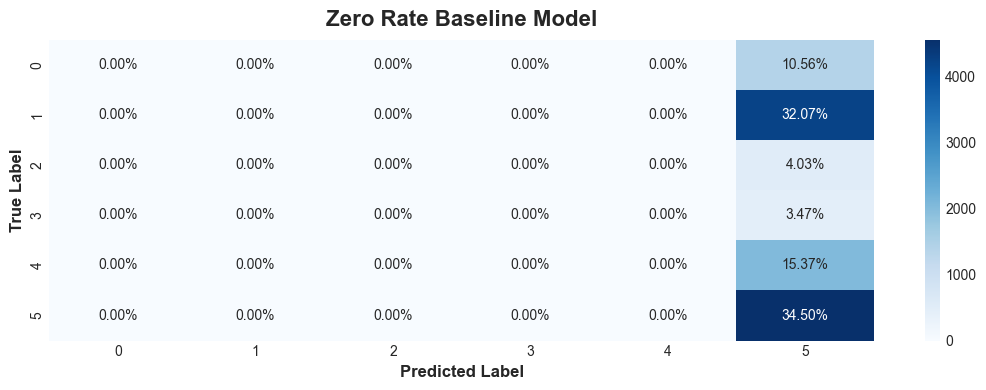

In [16]:
# create confusion matrix for multiclass classification as percentage
cm = confusion_matrix(y_test, predictions_baseline_model_1)

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [v1 for v1 in zip(group_percentages)]
labels = np.asarray(labels).reshape(6,6)

accuracy = np.round(accuracy_score(y_test, predictions_baseline_model_1), 4)
precision = np.round(precision_score(y_test, predictions_baseline_model_1, average='weighted'), 4)
recall = np.round(recall_score(y_test, predictions_baseline_model_1, average='weighted'), 4)
f1 = np.round(f1_score(y_test, predictions_baseline_model_1, average='weighted'), 4)

print(f'{accuracy=}')
print(f'{precision=}')
print(f'{recall=}')
print(f'{f1=}')

# plot confusion matrix
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title('Zero Rate Baseline Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Baseline Model 2
- Random-Rate Model
- Predicts a random class with the same probability as the most frequent class

In [9]:
class BaselineModelRandom:
    '''Random baseline model that randomly predicts 0 or 1 based on the distribution of the training set'''

    def fit(self, y_train: pd.Series):
        pass
        
    def predict(self, y: pd.DataFrame) -> pd.DataFrame:

        df = pd.DataFrame(y, columns=['activity'])

        # get the distribution of the training set
        distribution = df['activity'].value_counts(normalize=True)

        # create predictions
        predictions = np.random.choice(distribution.index, size=len(df), p=distribution.values)

        return np.array(predictions)

In [10]:
model = BaselineModelRandom()
model.fit(y_train)
predictions_baseline_model_2 = model.predict(y_test)

accuracy=0.2526
precision=0.2546
recall=0.2526
f1=0.2536


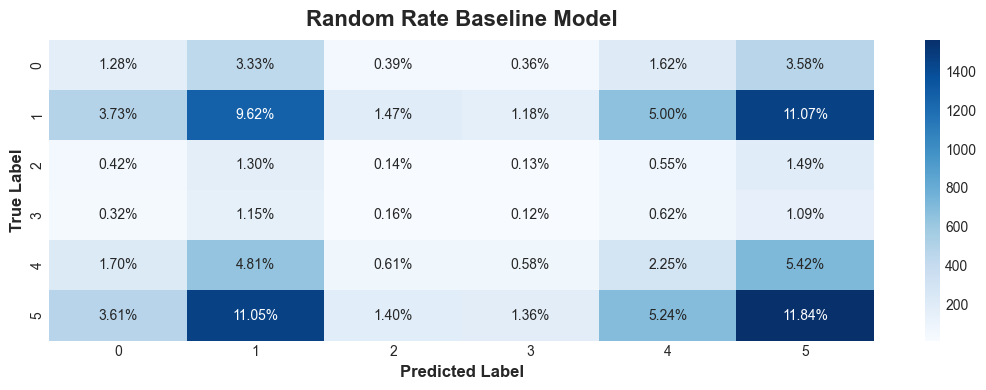

In [17]:
# create confusion matrix for multiclass classification as percentage
cm = confusion_matrix(y_test, predictions_baseline_model_2)

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [v1 for v1 in zip(group_percentages)]
labels = np.asarray(labels).reshape(6,6)

accuracy = np.round(accuracy_score(y_test, predictions_baseline_model_2), 4)
precision = np.round(precision_score(y_test, predictions_baseline_model_2, average='weighted'), 4)
recall = np.round(recall_score(y_test, predictions_baseline_model_2, average='weighted'), 4)
f1 = np.round(f1_score(y_test, predictions_baseline_model_2, average='weighted'), 4)

print(f'{accuracy=}')
print(f'{precision=}')
print(f'{recall=}')
print(f'{f1=}')

# plot confusion matrix
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title('Random Rate Baseline Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [12]:
# save predictions
pd.DataFrame(predictions_baseline_model_2).to_csv("predictions/predictions_baseline_model_2.csv", index=False)

# save predictions
pd.DataFrame(predictions_baseline_model_1).to_csv("predictions/predictions_baseline_model_1.csv", index=False)
